In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
print(os.listdir("/content/drive/MyDrive/rask4/leapGestRecog"))

# Any results you write to the current directory are saved as output.

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [5]:
import os
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
path='/content/drive/MyDrive/rask4/leapGestRecog'
folders=os.listdir(path)
folders=set(folders)

import codecs
import json


different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)




print("The different classes that exist in this dataset are:")
print(different_classes,sep='\n')

The different classes that exist in this dataset are:
{'05_thumb', '06_index', '01_palm', '07_ok', '10_down', '09_c', '04_fist_moved', '03_fist', '02_l', '08_palm_moved'}


In [6]:
x=[]
z=[]
y=[]#converting the image to black and white
threshold=200
import cv2


for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        print(j)
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))

            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf

print(list(set(y)))

# import pandas as pd
# df=pd.DataFrame({'x':x,'y':y})
# df.to_csv('results.csv',index=False)

*** 08 ***
05_thumb
06_index
01_palm
07_ok
10_down
09_c
04_fist_moved
03_fist
02_l
08_palm_moved
*** 00 ***
05_thumb
06_index
01_palm
07_ok
10_down
09_c
04_fist_moved
03_fist
02_l
08_palm_moved
*** 04 ***
05_thumb
06_index
01_palm
07_ok
10_down
09_c
04_fist_moved
03_fist
02_l
08_palm_moved
*** 07 ***
05_thumb
06_index
01_palm
07_ok
10_down
09_c
04_fist_moved
03_fist
02_l
08_palm_moved
*** 01 ***
05_thumb
06_index
01_palm
07_ok
10_down
09_c
04_fist_moved
03_fist
02_l
08_palm_moved
*** 06 ***
05_thumb
06_index
01_palm
07_ok
10_down
09_c
04_fist_moved
03_fist
02_l
08_palm_moved
*** 05 ***
05_thumb
06_index
01_palm
07_ok
10_down
09_c
04_fist_moved
03_fist
02_l
08_palm_moved
*** 09 ***
05_thumb
06_index
01_palm
07_ok
10_down
09_c
04_fist_moved
03_fist
02_l
08_palm_moved
*** 03 ***
05_thumb
06_index
01_palm
07_ok
10_down
09_c
04_fist_moved
03_fist
02_l
08_palm_moved
*** 02 ***
05_thumb
06_index
01_palm
07_ok
10_down
09_c
04_fist_moved
03_fist
02_l
08_palm_moved
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Class Label: 1


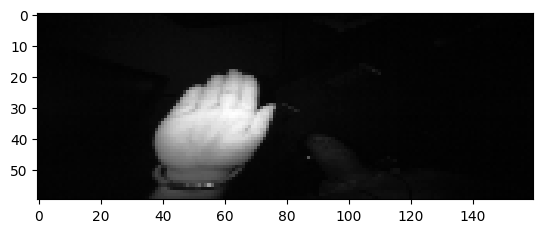

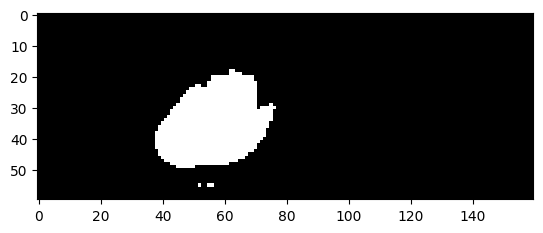

Class Label: 2


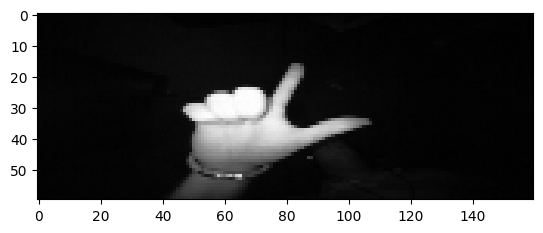

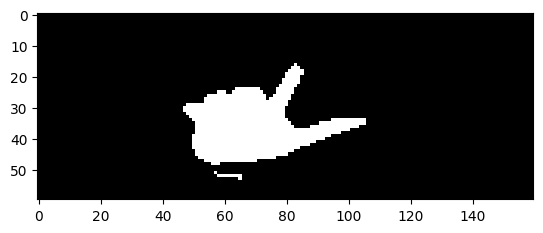

Class Label: 3


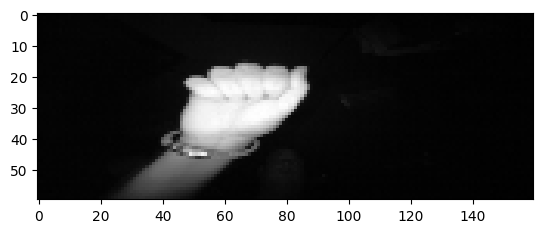

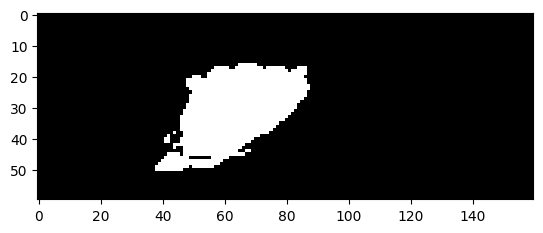

Class Label: 4


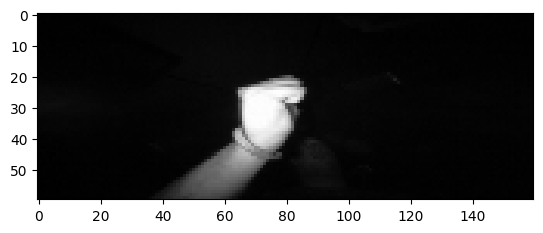

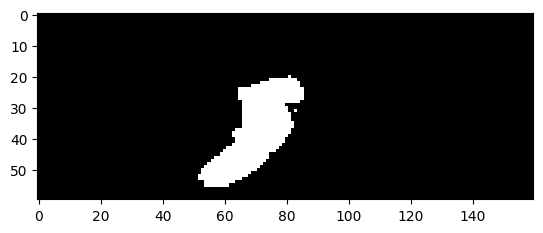

Class Label: 5


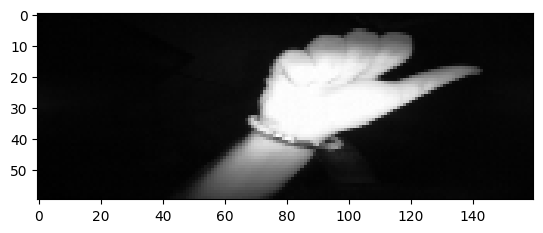

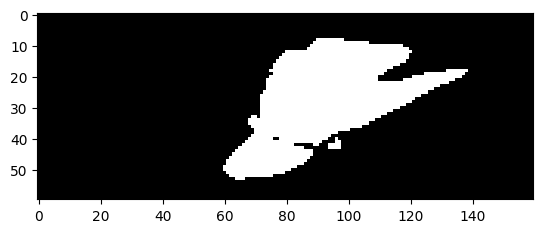

Class Label: 6


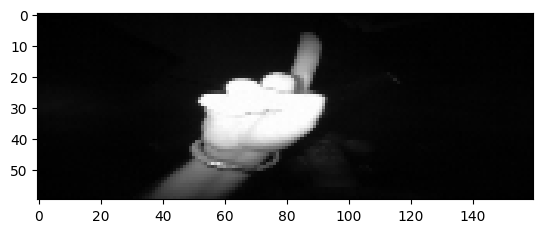

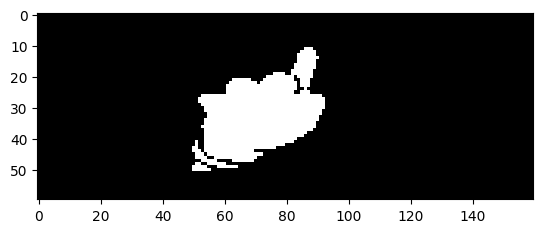

Class Label: 7


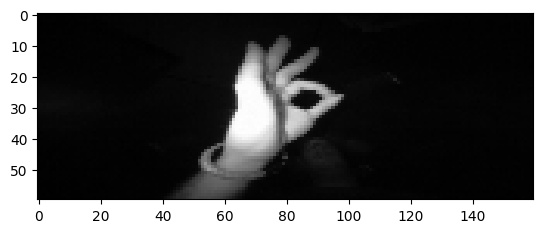

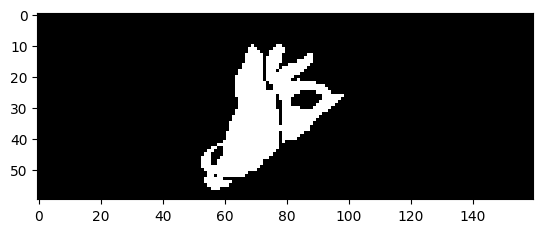

Class Label: 8


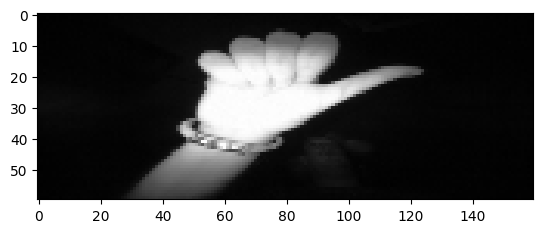

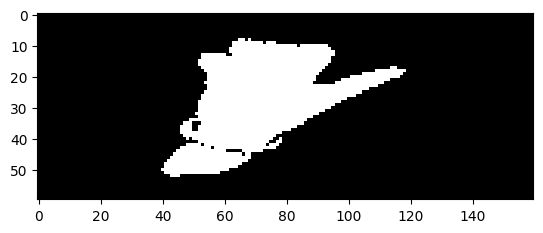

Class Label: 9


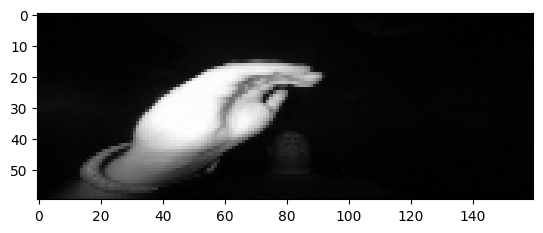

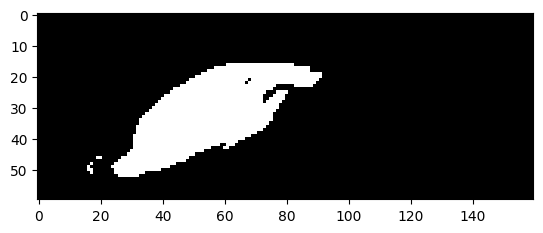

Class Label: 10


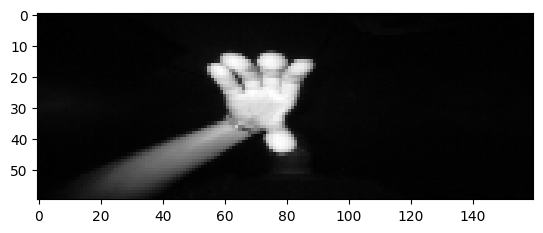

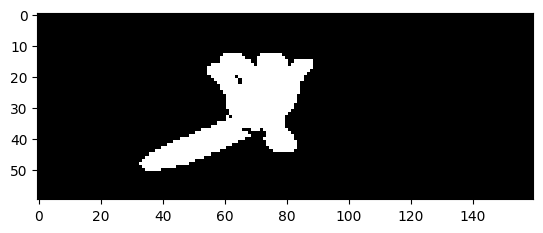

In [7]:
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)
    plt.show()

In [8]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [9]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
x_data=list(x_data)
for i in range(len(x_data)):
    x_data[i]=x_data[i].flatten()

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_data=np.array(x_data)
x_data=pca.fit_transform(x_data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.25498139 0.08075452 0.06690615 0.041779  ]
[1529.79553924  860.91952673  783.6320034   619.23884422]


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y,test_size = 0.2)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_further)

In [13]:
from sklearn.linear_model import SGDClassifier
sgd= SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
y_train_score_sgd=sgd.predict(X_train)
from sklearn.metrics import accuracy_score
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_sgd, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_sgd, normalize=True, sample_weight=None))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of the model is:
Test  0.2705
Train 0.2615


In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [15]:
y_pred_knn = classifier.predict(X_test)
y_train_score_knn=classifier.predict(X_train)

In [16]:
from sklearn.metrics import accuracy_score
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_knn, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_knn, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.97225
Train 0.980625


In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)

In [18]:
y_pred_dt=clf.predict(X_test)
y_train_score_dt=clf.predict(X_train)

In [19]:
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_dt, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_dt, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.8445
Train 0.8649375


In [20]:
from sklearn.ensemble import RandomForestClassifier
clf_rft = RandomForestClassifier(n_estimators=100, max_depth=15,random_state=0)
clf_rft = clf_rft.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [21]:
y_pred_rft=clf_rft.predict(X_test)
y_train_score_rft=clf_rft.predict(X_train)

In [22]:
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_rft, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_rft, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.975
Train 0.9966875


In [23]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver = 'lbfgs')
logistic.fit(X_train, y_train)
y_pred_logistic=logistic.predict(X_test)
y_train_score_logistic=logistic.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_logistic, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_logistic, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.33
Train 0.318875


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
names=['Stochastic Gradient Classifier','K Nearest Neighbour','Decision Tree','Random Forest Tree']
all_models=[y_pred_sgd,y_pred_knn,y_pred_dt,y_pred_rft ]
all_training=[y_train_score_sgd,y_train_score_knn,y_train_score_dt,y_train_score_rft]
testing_accuracy=[]
training_accuracy=[]
for i in all_models:
    testing_accuracy.append(accuracy_score(y_further, i, normalize=True, sample_weight=None))
for i in all_training:
    training_accuracy.append(accuracy_score(y_train, i, normalize=True, sample_weight=None))

In [28]:
import pandas as pd
df=pd.DataFrame({'Names':names,'Training Accuracy':training_accuracy,'Testing Accuracy':testing_accuracy})
df=df[['Names','Training Accuracy','Testing Accuracy']]
df

,Names,Training Accuracy,Testing Accuracy
0,Stochastic Gradient Classifier,0.261500,0.27050
1,K Nearest Neighbour,0.980625,0.97225
2,Decision Tree,0.864938,0.84450
3,Random Forest Tree,0.996687,0.97500
